## Explolatory Data Analysis For Financial inclusion in Africa Dataset

### Understand The Problem Statement

Financial Inclusion remains one of the main obstacles to economic and human development in Africa. For example, across Kenya, Rwanda, Tanzania, and Uganda only 9.1 million adults (or 13.9% of the adult population) have access to or use a commercial bank account.

Traditionally, access to bank accounts has been regarded as an indicator of financial inclusion. Despite the proliferation of mobile money in Africa, and the growth of innovative fintech solutions, banks still play a pivotal role in facilitating access to financial services. Access to bank accounts enable households to save and facilitate payments while also helping businesses build up their credit-worthiness and improve their access to other finance services. Therefore, access to bank accounts is an essential contributor to long-term economic growth.

The objective of this Dataset is to create a machine learning model to predict which individuals are most likely to have or use a bank account. The models and solutions developed can provide an indication of the state of financial inclusion in Kenya, Rwanda, Tanzania and Uganda, while providing insights into some of the key demographic factors that might drive individuals’ financial outcomes.

Data source available in the the zindi platform, [Zindi Africa](https://zindi.africa/competitions/financial-inclusion-in-africa)

### Type of the Problem
It is a classification problem where we have to predict whether individuals are most likely to have or use a bank account or not.In a classification problem, we have to predict discrete values based on a given set of independent variable.

### Hypothesis Generation
This is a very important stage in any data science/machine learning pipeline. It involves understanding the problem in detail by brainstorming as many factors as possible which can impact the outcome. It is done by understanding the problem statement thoroughly and before looking at the data.

Below are some of the factors which I think can affect the chance for a person to have a bank account

- People who have mobile phone have lower chance to use bank account because of mobile money services.
- People who are employed have a higher chance of having a bank account than People who are unemployed.
- people with low education have low chance to have bank account
- people in rural areas have low chance to have bank account 
- people who have age below 18 have low chance to have bank account
- female have less chance to have bank account



### Load Python Packages

In [1]:
# import important modules 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  
plt.rcParams["axes.labelsize"] = 18
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline 


## Load Dataset

In [2]:
# Import data
data = pd.read_csv('../data/Train_v2.csv')


In [3]:
# print shape 
print('train data shape :', data.shape)

train data shape : (23524, 13)


The above output show the number of rows and columns for dataset 

In [4]:
# Inspect Data by shing the first five rows 
data.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


**Note:** Open the VariableDefinition file to understand the meaning of each variable in this dataset 

### Explolatory Data Analysis 

This is the process of finding some insights from you dataset before create predictive models.

**Note:** This is important steps in your Data science workflow.

In [12]:
#show list of columns 
list(data.columns)  

['country',
 'year',
 'uniqueid',
 'bank_account',
 'location_type',
 'cellphone_access',
 'household_size',
 'age_of_respondent',
 'gender_of_respondent',
 'relationship_with_head',
 'marital_status',
 'education_level',
 'job_type']

In [13]:
## show Some information about the dataset 
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB
None


The outshow shows the list of variables , sizes and data types in each variables. This will help you to know what feature engineering you can apply.

In [14]:
# Check for missing values
print('missing values:', data.isnull().sum())

missing values: country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64


We don't have missing data in our dataset.

### A.Univariate Analysis

In this section, we will do univariate analysis. It is the simplest form of analyzing data where we examine each variable individually. For categorical features we can use frequency table or bar plots which will calculate the number of each category in a particular variable. For numerical features, probability density plots can be used to look at the distribution of the variable.

In [18]:
# Frequency table of a variable will give us the count of each category in that Target variable.
data['bank_account'].value_counts() 

No     20212
Yes     3312
Name: bank_account, dtype: int64

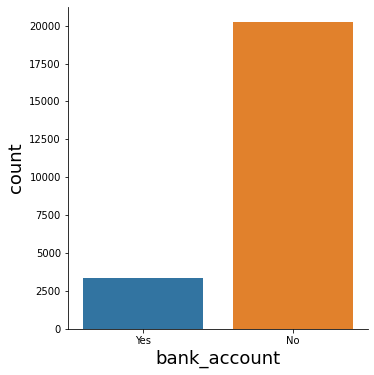

In [19]:
# Explore Target distribution 

sns.catplot(x="bank_account", kind="count", data= data)

The data shows that we have large number of **no** class than **yes** class  in our target variable 

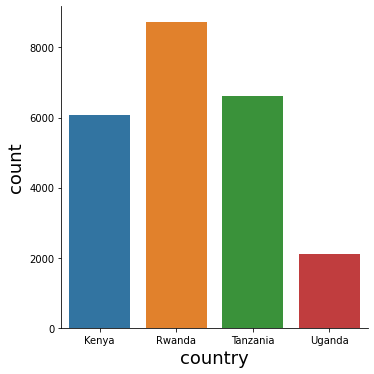

In [20]:
# Explore Country distribution 

sns.catplot(x="country", kind="count", data=data)

Most of the data where collected in Rwanda and less data collected in Uganda 

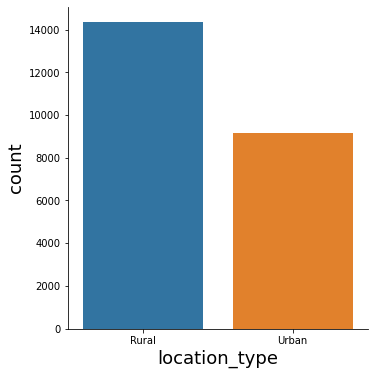

In [21]:
# Explore Location distribution 

sns.catplot(x="location_type", kind="count", data=data)

Most people live in rural area than urban area 

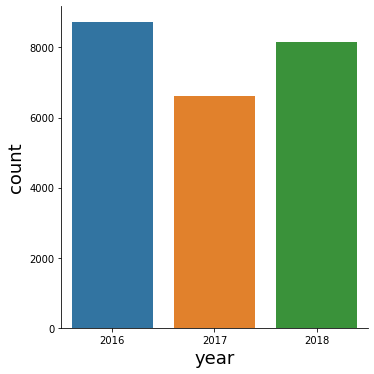

In [22]:
# Explore Years distribution 

sns.catplot(x="year", kind="count", data=data)

Most of the data were collected in 2016 

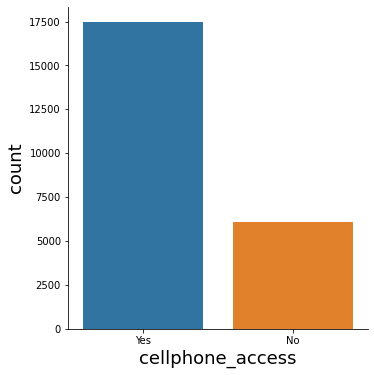

In [23]:
# Explore cellphone_access distribution 

sns.catplot(x="cellphone_access", kind="count", data=data)

Most of the particiapants have access to the cellphone 

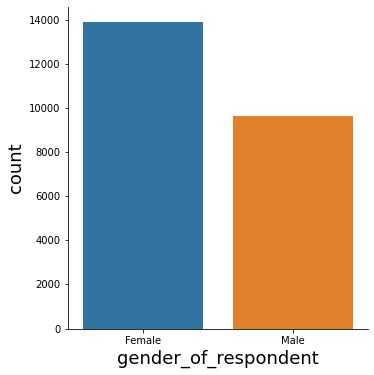

In [24]:
# Explore gender_of_respondents distribution 

sns.catplot(x="gender_of_respondent", kind="count", data=data)

We have more Females than Males 

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Spouse'),
  Text(1, 0, 'Head of Household'),
  Text(2, 0, 'Other relative'),
  Text(3, 0, 'Child'),
  Text(4, 0, 'Parent'),
  Text(5, 0, 'Other non-relatives')])

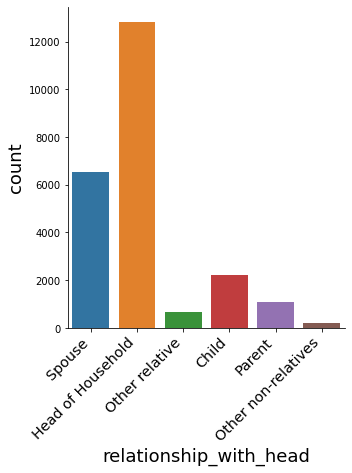

In [25]:

# Explore relationship_with_head distribution 

sns.catplot(x="relationship_with_head", kind="count", data=data);

plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

We have more head of Household particants and few other non-relatives 

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Married/Living together'),
  Text(1, 0, 'Widowed'),
  Text(2, 0, 'Single/Never Married'),
  Text(3, 0, 'Divorced/Seperated'),
  Text(4, 0, 'Dont know')])

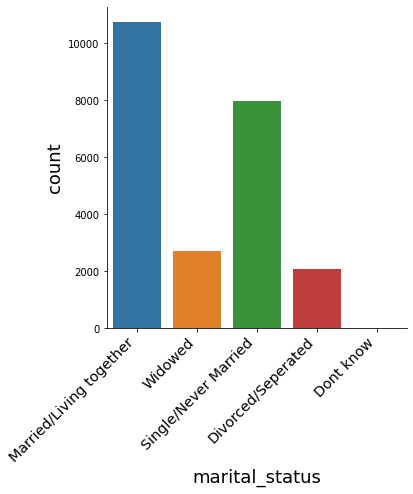

In [26]:

# Explore marital_status  distribution 

sns.catplot(x="marital_status", kind="count", data=data);

plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

Most of the participants are maried/living together

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Secondary education'),
  Text(1, 0, 'No formal education'),
  Text(2, 0, 'Vocational/Specialised training'),
  Text(3, 0, 'Primary education'),
  Text(4, 0, 'Tertiary education'),
  Text(5, 0, 'Other/Dont know/RTA')])

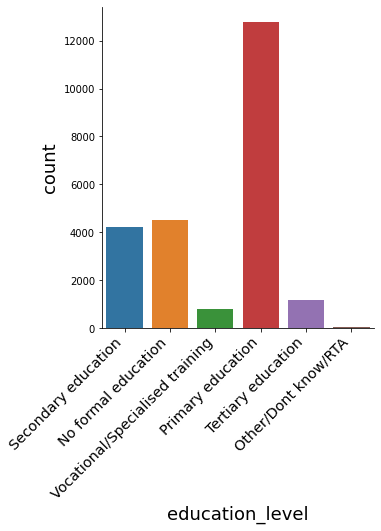

In [27]:
# Explore education_level  distribution 

sns.catplot(x="education_level", kind="count", data=data); 

plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

Most of the participants have primary education level 

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Self employed'),
  Text(1, 0, 'Government Dependent'),
  Text(2, 0, 'Formally employed Private'),
  Text(3, 0, 'Informally employed'),
  Text(4, 0, 'Formally employed Government'),
  Text(5, 0, 'Farming and Fishing'),
  Text(6, 0, 'Remittance Dependent'),
  Text(7, 0, 'Other Income'),
  Text(8, 0, 'Dont Know/Refuse to answer'),
  Text(9, 0, 'No Income')])

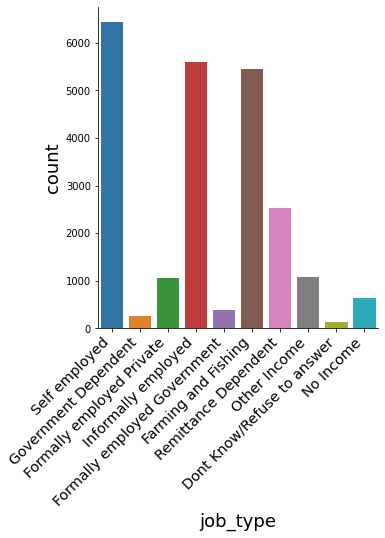

In [28]:
# Explore job_type distribution 


sns.catplot(x="job_type", kind="count", data=data); 

plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
) 

Most of the participants are self employed

Text(0.5, 0, 'Household  size')

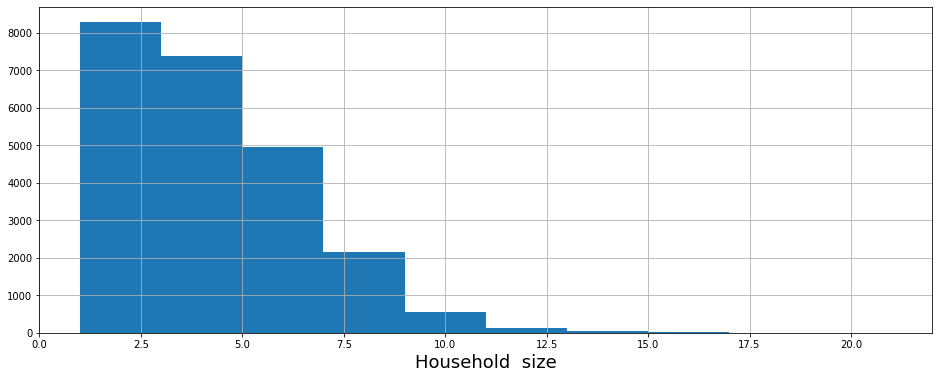

In [29]:

# Explore household_size distribution 

plt.figure(figsize=(16, 6))
data.household_size.hist() 
plt.xlabel('Household  size')

Household_size is not normally distributed and the most common number of people living in the house is 2 

Text(0.5, 0, 'Age of Respondent')

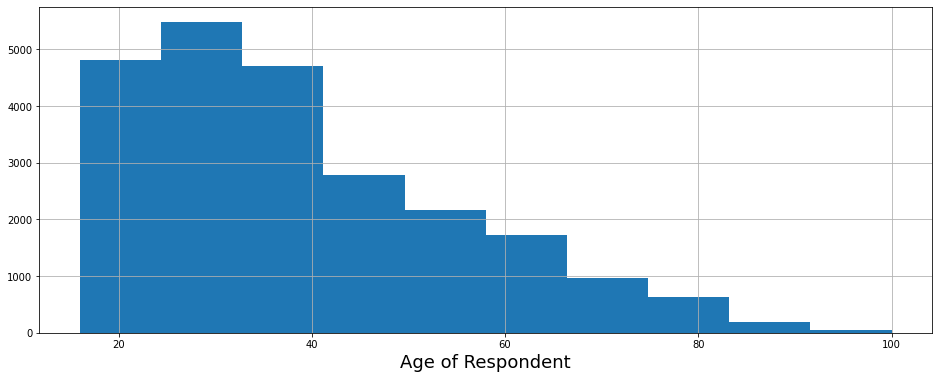

In [30]:
# Explore age_of_respondent distribution 
plt.figure(figsize=(16, 6))
data.age_of_respondent.hist() 
plt.xlabel('Age of Respondent')

most of the participant's age is between 25 and 35 

### B.Bivariate Analysis

Bivariate analysis is the simultaneous analysis of two variables (attributes). It explores the concept of relationship between two variables, whether there exists an association and the strength of this association, or whether there are differences between two variables and the significance of these differences.

After looking at every variable individually in univariate analysis, we will now explore them again with respect to the target variable.

(array([0, 1]), [Text(0, 0, 'Rural'), Text(1, 0, 'Urban')])

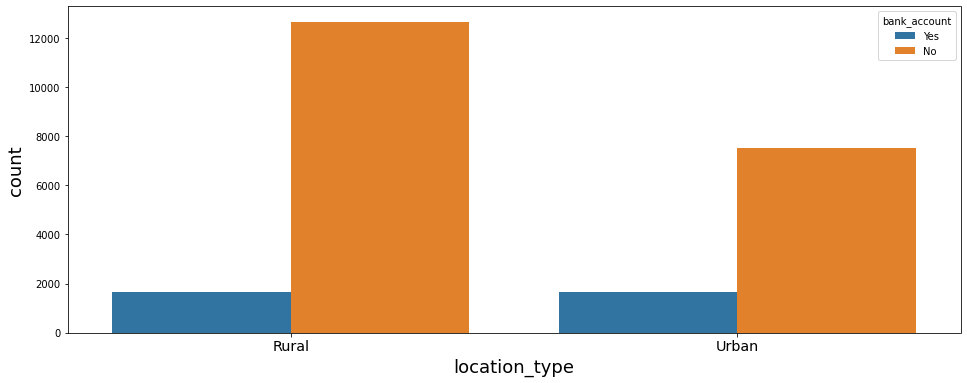

In [31]:
#Explore location type  vs bank account 

plt.figure(figsize=(16, 6))
sns.countplot('location_type', hue= 'bank_account', data=data)
plt.xticks(
    fontweight='light',
    fontsize='x-large'  
)

(array([0, 1]), [Text(0, 0, 'Female'), Text(1, 0, 'Male')])

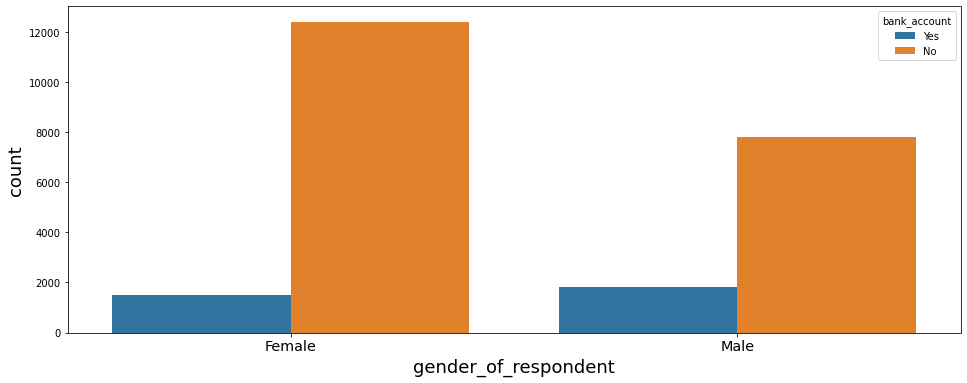

In [32]:
#Explore gender_of_respondent vs bank account 
plt.figure(figsize=(16, 6))
sns.countplot('gender_of_respondent', hue= 'bank_account', data=data)
plt.xticks(
    fontweight='light',
    fontsize='x-large'  
)

(array([0, 1]), [Text(0, 0, 'Yes'), Text(1, 0, 'No')])

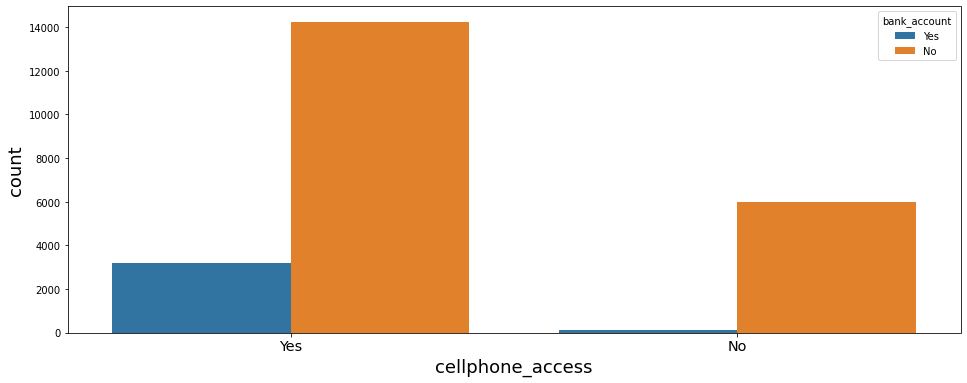

In [33]:
#Explore cellphone_accesst vs bank account 
plt.figure(figsize=(16, 6))
sns.countplot('cellphone_access', hue= 'bank_account', data=data)
plt.xticks(
    fontweight='light',
    fontsize='x-large'  
)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Spouse'),
  Text(1, 0, 'Head of Household'),
  Text(2, 0, 'Other relative'),
  Text(3, 0, 'Child'),
  Text(4, 0, 'Parent'),
  Text(5, 0, 'Other non-relatives')])

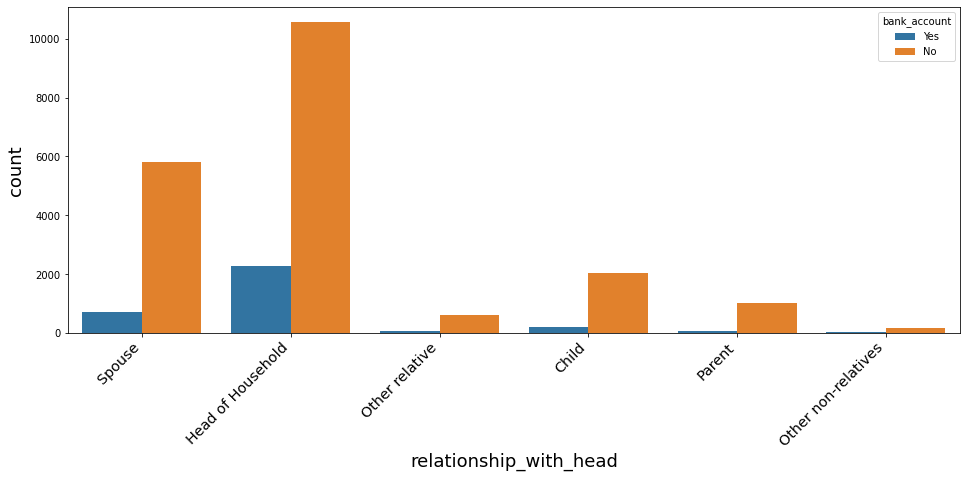

In [34]:
#Explore relationship_with_head vs bank account 

plt.figure(figsize=(16, 6))
sns.countplot('relationship_with_head', hue= 'bank_account', data=data)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Married/Living together'),
  Text(1, 0, 'Widowed'),
  Text(2, 0, 'Single/Never Married'),
  Text(3, 0, 'Divorced/Seperated'),
  Text(4, 0, 'Dont know')])

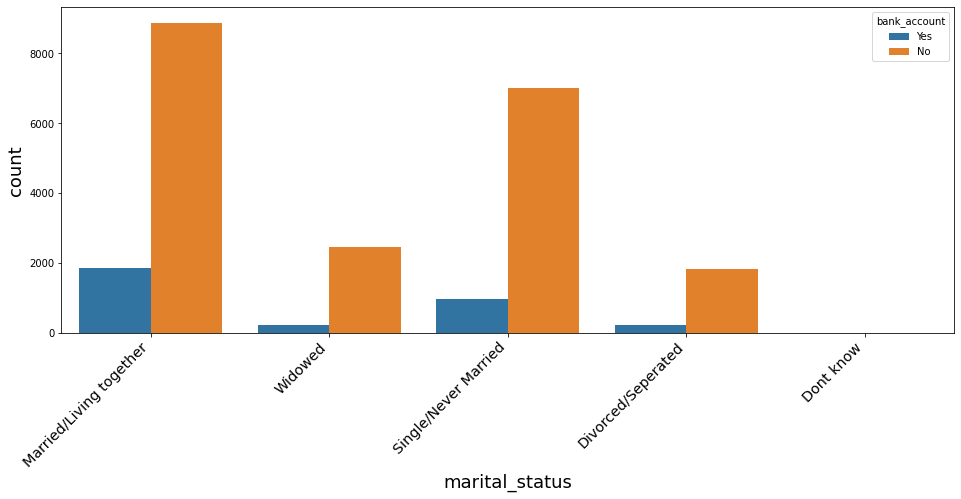

In [35]:
#Explore 'marital_status vs bank account 

plt.figure(figsize=(16, 6))
sns.countplot('marital_status', hue= 'bank_account', data=data)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Secondary education'),
  Text(1, 0, 'No formal education'),
  Text(2, 0, 'Vocational/Specialised training'),
  Text(3, 0, 'Primary education'),
  Text(4, 0, 'Tertiary education'),
  Text(5, 0, 'Other/Dont know/RTA')])

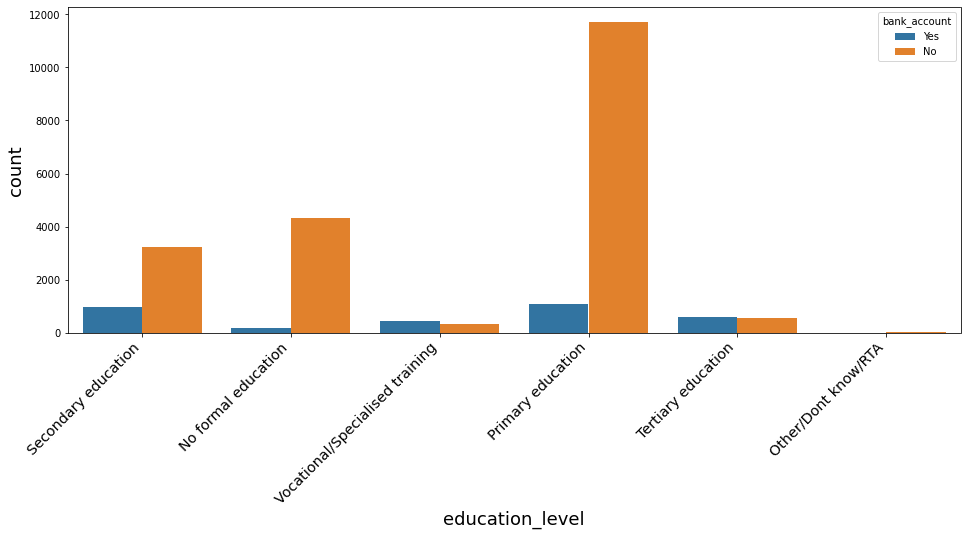

In [36]:
#Explore 'education_level vs bank account 

plt.figure(figsize=(16, 6))
sns.countplot('education_level', hue= 'bank_account', data=data)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Self employed'),
  Text(1, 0, 'Government Dependent'),
  Text(2, 0, 'Formally employed Private'),
  Text(3, 0, 'Informally employed'),
  Text(4, 0, 'Formally employed Government'),
  Text(5, 0, 'Farming and Fishing'),
  Text(6, 0, 'Remittance Dependent'),
  Text(7, 0, 'Other Income'),
  Text(8, 0, 'Dont Know/Refuse to answer'),
  Text(9, 0, 'No Income')])

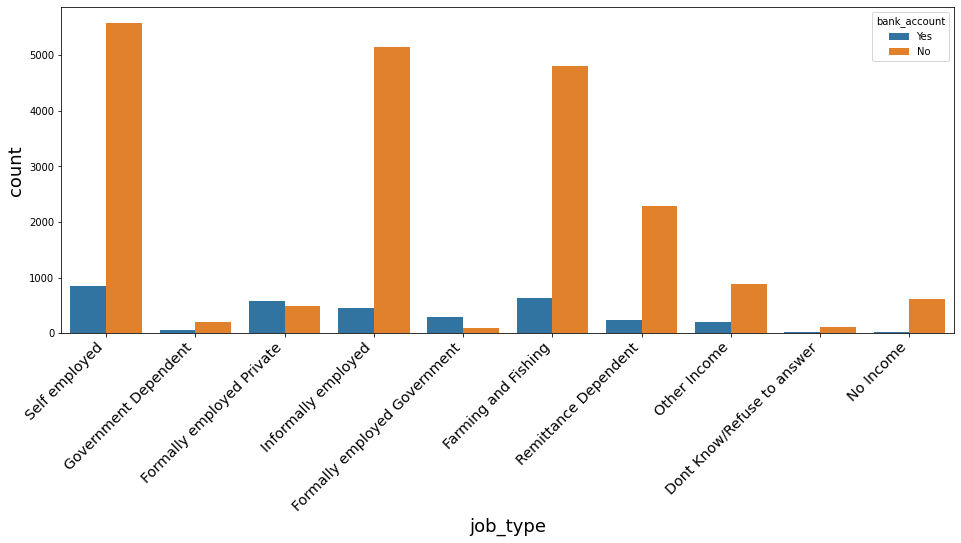

In [37]:
#Explore job_type vs bank account 

plt.figure(figsize=(16, 6))
sns.countplot('job_type', hue= 'bank_account', data=data)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

### Our Hypothesis Results

- People who have mobile phone have lower chance to use bank account because of mobile money services.-TRUE
- People who are employed have a higher chance of having a bank account than People who are unemployed. -TRUE
- people with low education have low chance to have bank account - TRUE
- people in rural areas have low chance to have bank account -TRUE
- people who have age below 18 have low chance to have bank account-TRUE
- female have less chance to have bank account -TRUE

### DATA PROFILING PACKAGE 

Profiling is a process that helps us in understanding our data and Pandas Profiling is python package which does exactly that. It is a simple and fast way to perform exploratory data analysis of a Pandas Dataframe. 

The pandas **df.describe()** and **df.info()** functions are normally used as a first step in the EDA process. However, it only gives a very basic overview of the data and doesn’t help much in the case of large data sets. The Pandas Profiling function, on the other hand, extends the pandas DataFrame with **df.profile_report()** for quick data analysis.

Pandas profiling generates a complete report for your dataset, which includes:
- Basic data type information
- Descriptive statistics (mean,median etc.)
- Common and Extreme Values 
- Quantile statistics (tells you about how your data is distributed)
- Histograms for your data (again, for visualizing distributions)
- Correlations (Show features that are related)
- Missing values 


#### how to install the packate 

You can install using the pip package manager by running

In [ ]:
!pip install pandas-profiling

Alternatively, you could install directly from Github:

In [ ]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

You can install using the conda package manager by running

In [ ]:
!conda install -c conda-forge pandas-profiling

In [38]:
#import the package 
import pandas_profiling 

Now let’s do the EDA using the package that we just imported. We can either print the output in the notebook environment or save to an HTML file that can be downloaded and shared with anyone. Here we will leverage google.colab download files option to download the file.

In [39]:
# generate report 
eda_report = pandas_profiling.ProfileReport(data)
eda_report

If you want to generate a HTML report file, save the ProfileReport to an object and use the to_file() function:

In [40]:
eda_report.to_file("eda_report.html") 

### SandDance Extension in Visual code Editor 

SandDance is a web-based application developed by Microsoft Research and available in visual code editor as an extension that enables you to more easily explore, identify, and communicate insights about data. SandDance provides ease of use for data visualizations, pattern identification, trends, and insights. It provides better decision-making capabilities through its dynamic and customizable interface, allowing views of both aggregate and individual data.

SandDance uses unit visualizations, which apply a one-to-one mapping between rows in your database and marks on the screen. Smooth animated transitions between views help you to maintain context as you interact with your data.

Visit [SandDance Github](https://microsoft.github.io/SandDance/) to know more about SandDance

#### Installation

To install this extension open your visual code editor , then click exntesion button search for **SandDance for VSCode**.Then click it to install in your visual code editor 

#### Usage

Right-click on a .csv or .tsv file and choose View in SandDance.


<img src="sanddance.PNG">

### OTHER RESOURCES TO LEARN EDA

 The following resources will help you gain more knowledge about Exploratory Data Analysis 
 
 - http://www.statgraphics.com/exploratory-data-analysis
 - https://www.datacamp.com/courses/exploratory-data-analysis
 - https://www.youtube.com/watch?v=5NcbVYhQJvw 
 - https://towardsdatascience.com/exploratory-data-analysis-in-python-c9a77dfa39ce
 - https://www.coursera.org/lecture/data-analysis-with-python/exploratory-data-analysis-iNeWs
 - https://www.activestate.com/blog/exploratory-data-analysis-using-python/?utm_campaign=exploratory-data-analysis-blog&utm_medium=referral&utm_source=kdnuggets&utm_content=2019-08-07-kdnuggets-article  
 - https://www.kaggle.com/kashnitsky/topic-1-exploratory-data-analysis-with-pandas
 - https://www.kaggle.com/ekami66/detailed-exploratory-data-analysis-with-python 